In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [104]:
base_url = 'https://www.airlinequality.com/airline-reviews/british-airways'
pages = 10
num_pages = 200

In [112]:
all_data = []


for page_num in range(1, num_pages + 1):
    
    print(f"Scraping page {num_pages}")
        
    url = f"{base_url}/page/{num_pages}/?sortby=post_date%3ADesc&pagesize={pages}"
    
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        all_data.append(para.get_text())
    
    print(f"   ---> {len(all_data)} total reviews")

     
    
    
    
    

        


Scraping page 200
   ---> 10 total reviews
Scraping page 200
   ---> 20 total reviews
Scraping page 200
   ---> 30 total reviews
Scraping page 200
   ---> 40 total reviews
Scraping page 200
   ---> 50 total reviews
Scraping page 200
   ---> 60 total reviews
Scraping page 200
   ---> 70 total reviews
Scraping page 200
   ---> 80 total reviews
Scraping page 200
   ---> 90 total reviews
Scraping page 200
   ---> 100 total reviews
Scraping page 200
   ---> 110 total reviews
Scraping page 200
   ---> 120 total reviews
Scraping page 200
   ---> 130 total reviews
Scraping page 200
   ---> 140 total reviews
Scraping page 200
   ---> 150 total reviews
Scraping page 200
   ---> 160 total reviews
Scraping page 200
   ---> 170 total reviews
Scraping page 200
   ---> 180 total reviews
Scraping page 200
   ---> 190 total reviews
Scraping page 200
   ---> 200 total reviews
Scraping page 200
   ---> 210 total reviews
Scraping page 200
   ---> 220 total reviews
Scraping page 200
   ---> 230 total revie

KeyboardInterrupt: 

In [113]:
df = pd.DataFrame()
df['reviews'] = all_data
df.head

<bound method NDFrame.head of                                                 reviews
0     ❎ Unverified |  Flew Gatwick to San Jose, Cost...
1     ✅ Verified Review |  Orlando to London. I had ...
2     ✅ Verified Review |  Newark to London Heathrow...
3     ✅ Verified Review |  Hyderabad to London. I ha...
4     ✅ Verified Review |  London to Chicago. In my ...
...                                                 ...
1915  ✅ Verified Review |  London to Vancouver retur...
1916  ✅ Verified Review |  Flew London Heathrow to G...
1917  ✅ Verified Review |  This is my first time fly...
1918  ✅ Verified Review |  British Airways are reall...
1919  ✅ Verified Review |  London Heathrow to Cape T...

[1920 rows x 1 columns]>

In [118]:
df.to_csv('scraped_reviews.csv', index=False)

In [119]:
df

,reviews
0,"❎ Unverified | Flew Gatwick to San Jose, Cost..."
1,✅ Verified Review | Orlando to London. I had ...
2,✅ Verified Review | Newark to London Heathrow...
3,✅ Verified Review | Hyderabad to London. I ha...
4,✅ Verified Review | London to Chicago. In my ...
...,...
1915,✅ Verified Review | London to Vancouver retur...
1916,✅ Verified Review | Flew London Heathrow to G...
1917,✅ Verified Review | This is my first time fly...
1918,✅ Verified Review | British Airways are reall...


In [120]:
df["Verified"] = df.reviews.str.contains("Trip Verified")


In [121]:
df

,reviews,Verified
0,"❎ Unverified | Flew Gatwick to San Jose, Cost...",False
1,✅ Verified Review | Orlando to London. I had ...,False
2,✅ Verified Review | Newark to London Heathrow...,False
3,✅ Verified Review | Hyderabad to London. I ha...,False
4,✅ Verified Review | London to Chicago. In my ...,False
...,...,...
1915,✅ Verified Review | London to Vancouver retur...,False
1916,✅ Verified Review | Flew London Heathrow to G...,False
1917,✅ Verified Review | This is my first time fly...,False
1918,✅ Verified Review | British Airways are reall...,False


In [122]:
df["Clean_reviews"] = df.reviews.str.split("|", expand = True)[1]

In [123]:
df

,reviews,Verified,Clean_reviews
0,"❎ Unverified | Flew Gatwick to San Jose, Cost...",False,"Flew Gatwick to San Jose, Costa Rica return ..."
1,✅ Verified Review | Orlando to London. I had ...,False,Orlando to London. I had booked business cla...
2,✅ Verified Review | Newark to London Heathrow...,False,Newark to London Heathrow. This was the firs...
3,✅ Verified Review | Hyderabad to London. I ha...,False,Hyderabad to London. I have travelled BA num...
4,✅ Verified Review | London to Chicago. In my ...,False,London to Chicago. In my opinion British Air...
...,...,...,...
1915,✅ Verified Review | London to Vancouver retur...,False,London to Vancouver return. British Airways ...
1916,✅ Verified Review | Flew London Heathrow to G...,False,Flew London Heathrow to Gibraltar. This is p...
1917,✅ Verified Review | This is my first time fly...,False,This is my first time flying on BA's A380 da...
1918,✅ Verified Review | British Airways are reall...,False,British Airways are really trying to take al...


In [126]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
import string

In [130]:
 nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [133]:
pos_dict = { "J" : wordnet.ADJ , "N" : wordnet.NOUN, "V" : wordnet.VERB, "R" : wordnet.ADV }

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    stop_words = set(stopwords.words("english"))
    new_list = []
    for word, tag in tags:
        if word.lower() not in stop_words and word.lower() not in string.punctuation:
            new_list.append(tuple([word, pos_dict.get(tag[0])]))

    return new_list
df["POS_tagged"] = df["Clean_reviews"].apply(token_stop_pos)
df.head()



,reviews,Verified,Clean_reviews,POS_tagged
0,"❎ Unverified | Flew Gatwick to San Jose, Cost...",False,"Flew Gatwick to San Jose, Costa Rica return ...","[(Flew, n), (Gatwick, n), (San, n), (Jose, n),..."
1,✅ Verified Review | Orlando to London. I had ...,False,Orlando to London. I had booked business cla...,"[(Orlando, n), (London, n), (booked, v), (busi..."
2,✅ Verified Review | Newark to London Heathrow...,False,Newark to London Heathrow. This was the firs...,"[(Newark, n), (London, n), (Heathrow, n), (fir..."
3,✅ Verified Review | Hyderabad to London. I ha...,False,Hyderabad to London. I have travelled BA num...,"[(Hyderabad, n), (London, n), (travelled, v), ..."
4,✅ Verified Review | London to Chicago. In my ...,False,London to Chicago. In my opinion British Air...,"[(London, n), (Chicago, n), (opinion, n), (Bri..."


In [134]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


def lemmatise(pos_data):
    #Loop through each review to remove stopwords, and make it lower case
     corpus = []
     for word, pos in pos_data:
         if not pos:
             lemma = word.lower()
             corpus.append(lemma)
         else:
             lemma = lemmatizer.lemmatize(word.lower(), pos = pos) 
             if lemma not in stop_words and lemma not in string.punctuation:
                 corpus.append(lemma)

     return " ".join(corpus)

df["Lemma_review"] = df["POS_tagged"].apply(lemmatise)
df.head()

,reviews,Verified,Clean_reviews,POS_tagged,Lemma_review
0,"❎ Unverified | Flew Gatwick to San Jose, Cost...",False,"Flew Gatwick to San Jose, Costa Rica return ...","[(Flew, n), (Gatwick, n), (San, n), (Jose, n),...",flew gatwick san jose costa rica return ba goo...
1,✅ Verified Review | Orlando to London. I had ...,False,Orlando to London. I had booked business cla...,"[(Orlando, n), (London, n), (booked, v), (busi...",orlando london book business class want comfor...
2,✅ Verified Review | Newark to London Heathrow...,False,Newark to London Heathrow. This was the firs...,"[(Newark, n), (London, n), (Heathrow, n), (fir...",newark london heathrow first time fly long-hau...
3,✅ Verified Review | Hyderabad to London. I ha...,False,Hyderabad to London. I have travelled BA num...,"[(Hyderabad, n), (London, n), (travelled, v), ...",hyderabad london travel ba numerous time good ...
4,✅ Verified Review | London to Chicago. In my ...,False,London to Chicago. In my opinion British Air...,"[(London, n), (Chicago, n), (opinion, n), (Bri...",london chicago opinion british airway massivel...


In [135]:
df.Lemma_review.isnull().sum()

0

In [137]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(reviews):
    # Get sentiment scores
    scores = analyzer.polarity_scores(reviews)
    return scores["compound"]

df["Sentiment"]  = df["Lemma_review"].apply( get_sentiment)

def analysis(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(analysis)

df

In [136]:
!pip install vaderSentiment
nltk.download('vader_lexicon')

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 108.9 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/126.0 kB 108.9 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 108.9 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 148.8 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 191.1 kB/s eta 0:00:01
   ---------------------

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [139]:
from nltk.sentiment import SentimentIntensityAnalyzer

def get_sentiment(reviews):
    # Get sentiment scores
    scores = analyzer.polarity_scores(reviews)
    return scores["compound"]

df["Sentiment"]  = df["Lemma_review"].apply( get_sentiment)

def analysis(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


df['Analysis'] = df['Sentiment'].apply(analysis)

df


,reviews,Verified,Clean_reviews,POS_tagged,Lemma_review,Sentiment,Analysis
0,"❎ Unverified | Flew Gatwick to San Jose, Cost...",False,"Flew Gatwick to San Jose, Costa Rica return ...","[(Flew, n), (Gatwick, n), (San, n), (Jose, n),...",flew gatwick san jose costa rica return ba goo...,0.7826,Positive
1,✅ Verified Review | Orlando to London. I had ...,False,Orlando to London. I had booked business cla...,"[(Orlando, n), (London, n), (booked, v), (busi...",orlando london book business class want comfor...,0.5106,Positive
2,✅ Verified Review | Newark to London Heathrow...,False,Newark to London Heathrow. This was the firs...,"[(Newark, n), (London, n), (Heathrow, n), (fir...",newark london heathrow first time fly long-hau...,0.2732,Positive
3,✅ Verified Review | Hyderabad to London. I ha...,False,Hyderabad to London. I have travelled BA num...,"[(Hyderabad, n), (London, n), (travelled, v), ...",hyderabad london travel ba numerous time good ...,0.3058,Positive
4,✅ Verified Review | London to Chicago. In my ...,False,London to Chicago. In my opinion British Air...,"[(London, n), (Chicago, n), (opinion, n), (Bri...",london chicago opinion british airway massivel...,0.7964,Positive
...,...,...,...,...,...,...,...
1915,✅ Verified Review | London to Vancouver retur...,False,London to Vancouver return. British Airways ...,"[(London, n), (Vancouver, n), (return, n), (Br...",london vancouver return british airway longer ...,0.8442,Positive
1916,✅ Verified Review | Flew London Heathrow to G...,False,Flew London Heathrow to Gibraltar. This is p...,"[(Flew, n), (London, n), (Heathrow, n), (Gibra...",flew london heathrow gibraltar probably last t...,0.9351,Positive
1917,✅ Verified Review | This is my first time fly...,False,This is my first time flying on BA's A380 da...,"[(first, a), (time, n), (flying, v), (BA, n), ...",first time fly ba 's a380 daily service london...,0.9035,Positive
1918,✅ Verified Review | British Airways are reall...,False,British Airways are really trying to take al...,"[(British, a), (Airways, n), (really, r), (try...",british airway really try take bad part budget...,-0.2814,Negative


In [140]:
count =df["Analysis"].value_counts()
count

Analysis
Positive    1536
Negative     384
Name: count, dtype: int64

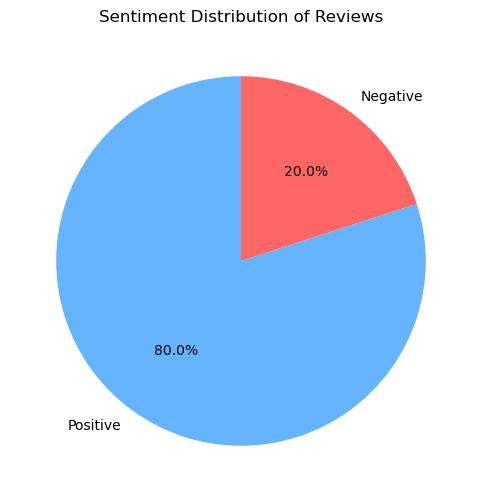

In [142]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category (Positive, Negative, Neutral)
sentiment_counts = df['Analysis'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666', '#99ff99'])

# Title of the chart
plt.title('Sentiment Distribution of Reviews')

# Display the chart
plt.show()

In [144]:
!pip install wordcloud matplotlib

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 131.3 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/299.9 kB 131.3 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/299.9 kB 122.9 kB/s eta 0:00:03
   ------- ------------------------------- 61.4/299.9 kB 182.2 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/299.9 kB 187.3 kB/s eta 0:00:02
   ------------ ------------------------- 102.4/299.9 kB 236.3 kB/s eta 0:00:01
   ---------------- -

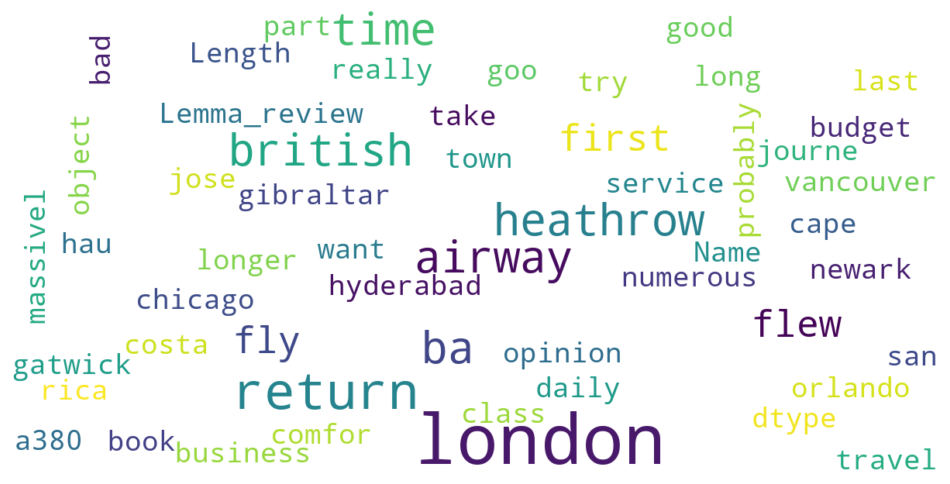

In [145]:
from wordcloud import WordCloud

stop_words = set(stopwords.words("english"))

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=500,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud, interpolation= 'bilinear')
    plt.show()

show_wordcloud(df.Lemma_review)

In [146]:
data = df.copy()

In [147]:
df

,reviews,Verified,Clean_reviews,POS_tagged,Lemma_review,Sentiment,Analysis
0,"❎ Unverified | Flew Gatwick to San Jose, Cost...",False,"Flew Gatwick to San Jose, Costa Rica return ...","[(Flew, n), (Gatwick, n), (San, n), (Jose, n),...",flew gatwick san jose costa rica return ba goo...,0.7826,Positive
1,✅ Verified Review | Orlando to London. I had ...,False,Orlando to London. I had booked business cla...,"[(Orlando, n), (London, n), (booked, v), (busi...",orlando london book business class want comfor...,0.5106,Positive
2,✅ Verified Review | Newark to London Heathrow...,False,Newark to London Heathrow. This was the firs...,"[(Newark, n), (London, n), (Heathrow, n), (fir...",newark london heathrow first time fly long-hau...,0.2732,Positive
3,✅ Verified Review | Hyderabad to London. I ha...,False,Hyderabad to London. I have travelled BA num...,"[(Hyderabad, n), (London, n), (travelled, v), ...",hyderabad london travel ba numerous time good ...,0.3058,Positive
4,✅ Verified Review | London to Chicago. In my ...,False,London to Chicago. In my opinion British Air...,"[(London, n), (Chicago, n), (opinion, n), (Bri...",london chicago opinion british airway massivel...,0.7964,Positive
...,...,...,...,...,...,...,...
1915,✅ Verified Review | London to Vancouver retur...,False,London to Vancouver return. British Airways ...,"[(London, n), (Vancouver, n), (return, n), (Br...",london vancouver return british airway longer ...,0.8442,Positive
1916,✅ Verified Review | Flew London Heathrow to G...,False,Flew London Heathrow to Gibraltar. This is p...,"[(Flew, n), (London, n), (Heathrow, n), (Gibra...",flew london heathrow gibraltar probably last t...,0.9351,Positive
1917,✅ Verified Review | This is my first time fly...,False,This is my first time flying on BA's A380 da...,"[(first, a), (time, n), (flying, v), (BA, n), ...",first time fly ba 's a380 daily service london...,0.9035,Positive
1918,✅ Verified Review | British Airways are reall...,False,British Airways are really trying to take al...,"[(British, a), (Airways, n), (really, r), (try...",british airway really try take bad part budget...,-0.2814,Negative


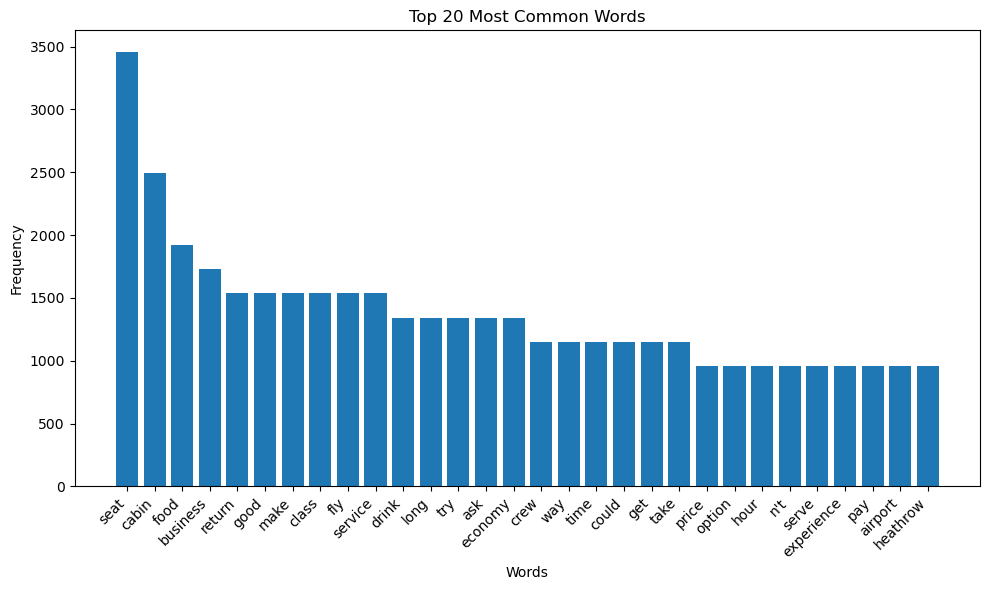

          Word  Frequency
0         seat       3456
1        cabin       2496
2         food       1920
3     business       1728
4       return       1536
5         good       1536
6         make       1536
7        class       1536
8          fly       1536
9      service       1536
10       drink       1344
11        long       1344
12         try       1344
13         ask       1344
14     economy       1344
15        crew       1152
16         way       1152
17        time       1152
18       could       1152
19         get       1152
20        take       1152
21       price        960
22      option        960
23        hour        960
24         n't        960
25       serve        960
26  experience        960
27         pay        960
28     airport        960
29    heathrow        960


In [150]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd


review = df['Lemma_review'].str.split(" ") 

# Define words to be removed
words_to_remove = ["flight", "britshh", "ba", "review", "passenger", "london", "frequency", "plan", "airway", 
                   "hearthrow", "burcharest", "james", "milan", "boston", "subscidary", "vancover", "caligary","airline",
                   "miami", "houston", "malaga", "may", "world", "euroflyer", "4th", "hannover", "lemma_review","british"]

# Remove stopwords and unwanted words
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for sublist in review for word in sublist if word.lower() not in stop_words and word.lower() not in words_to_remove]

# Generate n-grams (you can specify n as needed)
n = 1  
ngram_tokens = list(ngrams(filtered_tokens, n))

# Calculate frequency distribution
freq_dist = FreqDist(ngram_tokens)

# Get top 20 most common n-grams
top_30_common = freq_dist.most_common(30)

# # Create dataframe for words and their frequency
# df_frequency = pd.DataFrame({'Word': [' '.join(ngram) for ngram in top_20_common], 'Frequency': [count for _, count in top_20_common]})

# Extract n-grams and frequency counts separately
ngrams_list = [' '.join(ngram) for ngram, _ in top_30_common]
frequency_list = [count for _, count in top_30_common]

# Create dataframe for words and their frequency
df_frequency = pd.DataFrame({'Word': ngrams_list, 'Frequency': frequency_list})


# Plot frequency histogram
plt.figure(figsize=(10, 6))
plt.bar(df_frequency['Word'], df_frequency['Frequency'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the dataframe
print(df_frequency)



# # Create dataframe for words and their frequency
# df_frequency = pd.DataFrame(top_20_common, columns=['Word', 'Frequency'])